# Credit Risk Project




*   CABAL Paul-Louis
*   GRAS Benoît
*   D'ANTIN Tristan
*   BRAUN Arthur



# Chargement du fichier et nettoyage

Chargement du fichier et affichage des premières lignes

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("drive/MyDrive/DATA/trainTD3Simpl.csv")
dico = pd.read_csv("drive/MyDrive/DATA/data_dictionary.csv")

data.head()

Mounted at /content/drive


,UniqueID,disbursed_amount,asset_cost,ltv,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,645248,59713,74114,81.63,16310,86,988,16/09/1965,Self employed,31/10/2018,...,0.0,0.0,0.0,185.0,0,0,0yrs 7mon,1yrs 1mon,0,1
1,647413,57259,68892,84.19,15271,86,981,01/01/1968,Self employed,31/10/2018,...,33777.0,40000.0,40000.0,3645.0,0,0,1yrs 6mon,2yrs 0mon,0,0
2,424974,45545,58350,79.69,16680,45,481,01/12/1971,Salaried,09/04/2016,...,3541031.0,3794342.0,3794342.0,70888.0,1,0,2yrs 1mon,5yrs 1mon,0,0
3,425862,54013,73960,75.72,23448,45,5834,26/01/1972,Self employed,09/04/2016,...,450163.0,450000.0,450000.0,23797.0,1,1,2yrs 5mon,3yrs 7mon,1,0
4,648360,57113,70000,83.86,23007,86,5096,12/10/1991,Self employed,31/10/2018,...,0.0,0.0,0.0,4931.0,0,0,1yrs 4mon,2yrs 6mon,0,1


In [ ]:
data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,MobileNo_Avl_Flag,Aadhar_flag,...,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1475.0,1475.000000,...,1475.000000,1475.000000,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1475.000000,1475.000000,1475.000000,1475.000000
mean,551758.488136,55246.214915,75893.262373,75.727810,19420.048136,70.051525,3164.357966,7.016949,1.0,0.833898,...,1.736271,0.240678,2.359630e+05,2.960307e+05,2.979782e+05,1.451071e+04,0.642712,0.151864,0.294237,0.269153
std,69339.061060,13413.015846,19061.052394,11.331516,3518.925540,21.725437,2159.960016,4.358477,0.0,0.372298,...,2.356666,0.632434,7.448673e+05,8.232049e+05,8.424883e+05,1.370363e+05,1.194375,0.473148,0.881092,0.443670
min,417614.000000,15579.000000,39684.000000,25.720000,12374.000000,45.000000,5.000000,1.000000,1.0,0.000000,...,0.000000,0.000000,-4.826000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,494430.000000,47899.000000,66052.000000,69.835000,16211.500000,48.000000,1449.000000,4.000000,1.0,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,565051.000000,54513.000000,70518.000000,77.700000,18578.000000,86.000000,2711.000000,6.000000,1.0,1.000000,...,1.000000,0.000000,1.423700e+04,3.931600e+04,3.842400e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,612785.000000,60947.000000,78436.000000,84.625000,22937.500000,86.000000,5093.500000,9.000000,1.0,1.000000,...,2.000000,0.000000,1.185370e+05,1.943445e+05,1.946150e+05,5.667500e+03,1.000000,0.000000,0.000000,1.000000
max,653991.000000,153318.000000,215528.000000,94.950000,24793.000000,145.000000,7341.000000,21.000000,1.0,1.000000,...,24.000000,8.000000,1.009157e+07,1.000000e+07,1.000000e+07,4.189968e+06,13.000000,7.000000,13.000000,1.000000


In [ ]:
data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.B

On remarque que certaines variables pourraient être inexploitable en tant que tel. Par exemple Date.of.Birth qui n'est pas enregistré comme un datatime object.

Analyse des données manquantes et colonnes à données uniques

In [ ]:
missing_values = data.isnull().sum()
unique_value_counts = data.nunique()
missing_values_summary = missing_values[missing_values > 0]
unique_values_summary = unique_value_counts[unique_value_counts == 1]
missing_values_summary, unique_values_summary

(Employment.Type    45
 dtype: int64,
 MobileNo_Avl_Flag    1
 dtype: int64)

On remarque que deux colonnes ont des valeurs manquantes. 'Employment.Type' pourra etre très important dans notre process.

Nettoyage du dataframe. Ici on ne touche pas à Employment.Type mais supprime la colonne MobileNo_Avl_Flag et autres variables peu intéressantes, ou bien inexploitable. La plupart sont des informations sur le client qui n'ont aucun lien avec une probabilité de défaut(ex n° de telephone)



In [ ]:
data = data.drop(['MobileNo_Avl_Flag','UniqueID','supplier_id','manufacturer_id','Current_pincode_ID','MobileNo_Avl_Flag','Passport_flag','Aadhar_flag','VoterID_flag','Driving_flag','PERFORM_CNS.SCORE.DESCRIPTION'], axis=1)
data.head()

,disbursed_amount,asset_cost,ltv,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,...,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,59713,74114,81.63,16/09/1965,Self employed,31/10/2018,6,832,15,0,...,0.0,0.0,0.0,185.0,0,0,0yrs 7mon,1yrs 1mon,0,1
1,57259,68892,84.19,01/01/1968,Self employed,31/10/2018,6,825,4,1,...,33777.0,40000.0,40000.0,3645.0,0,0,1yrs 6mon,2yrs 0mon,0,0
2,45545,58350,79.69,01/12/1971,Salaried,09/04/2016,11,805,10,6,...,3541031.0,3794342.0,3794342.0,70888.0,1,0,2yrs 1mon,5yrs 1mon,0,0
3,54013,73960,75.72,26/01/1972,Self employed,09/04/2016,3,643,4,1,...,450163.0,450000.0,450000.0,23797.0,1,1,2yrs 5mon,3yrs 7mon,1,0
4,57113,70000,83.86,12/10/1991,Self employed,31/10/2018,3,754,3,0,...,0.0,0.0,0.0,4931.0,0,0,1yrs 4mon,2yrs 6mon,0,1


Conversion des variables en objets exploitables (eg les dates et temps)

*   1yrs 6mon -> 18.0
*   16/09/1965 -> 58.25
*   Salaried -> 1 else 0
*   etc





In [ ]:
from datetime import datetime, timedelta
def to_float(temps):

  years, months = temps.split()
  total_years = int(years[:-3])*12 + int(months[:-3])
  return total_years

data['CREDIT.HISTORY.LENGTH']=[to_float(d) for d in data['CREDIT.HISTORY.LENGTH']]
data['AVERAGE.ACCT.AGE']=[to_float(d) for d in data['AVERAGE.ACCT.AGE']]

def to_time_delta(date):
  date2 = datetime.now()
  months = (date2.year - date.year) * 12 + (date2.month - date.month)
  return months

data['DisbursalDate']=pd.to_datetime(data['DisbursalDate'])
data['DisbursalDate']=[to_time_delta(d)for d in data['DisbursalDate']]
data['Date.of.Birth']=pd.to_datetime(data['Date.of.Birth'])
data['Date.of.Birth']=[to_time_delta(d)/12 for d in data['Date.of.Birth']]
data = data.rename(columns={'Date.of.Birth':'Age'})

data['Employment.Type']=[1 if i=='Salaried' else 0 for i in data['Employment.Type']]

data.dtypes


<ipython-input-7-45a678fdfdfb>:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['DisbursalDate']=pd.to_datetime(data['DisbursalDate'])
<ipython-input-7-45a678fdfdfb>:18: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date.of.Birth']=pd.to_datetime(data['Date.of.Birth'])


disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
Age                                    float64
Employment.Type                          int64
DisbursalDate                            int64
State_ID                                 int64
PERFORM_CNS.SCORE                        int64
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                    float64
PRI.SANCTIONED.AMOUNT                  float64
PRI.DISBURSED.AMOUNT                   float64
PRIMARY.INSTAL.AMT                     float64
NEW.ACCTS.IN.LAST.SIX.MONTHS             int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      int64
AVERAGE.ACCT.AGE                         int64
CREDIT.HISTORY.LENGTH                    int64
NO.OF_INQUIRIES                          int64
loan_default                             int64
dtype: object

On a maintenant uniquement des variables utilisables i.e ici numérique ou binaire.

In [ ]:
data.head()

,disbursed_amount,asset_cost,ltv,Age,Employment.Type,DisbursalDate,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,...,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,59713,74114,81.63,58.250000,0,62,6,832,15,0,...,0.0,0.0,0.0,185.0,0,0,7,13,0,1
1,57259,68892,84.19,55.916667,0,62,6,825,4,1,...,33777.0,40000.0,40000.0,3645.0,0,0,18,24,0,0
2,45545,58350,79.69,52.916667,1,87,11,805,10,6,...,3541031.0,3794342.0,3794342.0,70888.0,1,0,25,61,0,0
3,54013,73960,75.72,51.916667,0,87,3,643,4,1,...,450163.0,450000.0,450000.0,23797.0,1,1,29,43,1,0
4,57113,70000,83.86,32.000000,0,62,3,754,3,0,...,0.0,0.0,0.0,4931.0,0,0,16,30,0,1


In [ ]:
data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Age', 'Employment.Type',
       'DisbursalDate', 'State_ID', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

# Analyse des données et variables

On regarde d'un peu plus près nos variables et leur silhouette

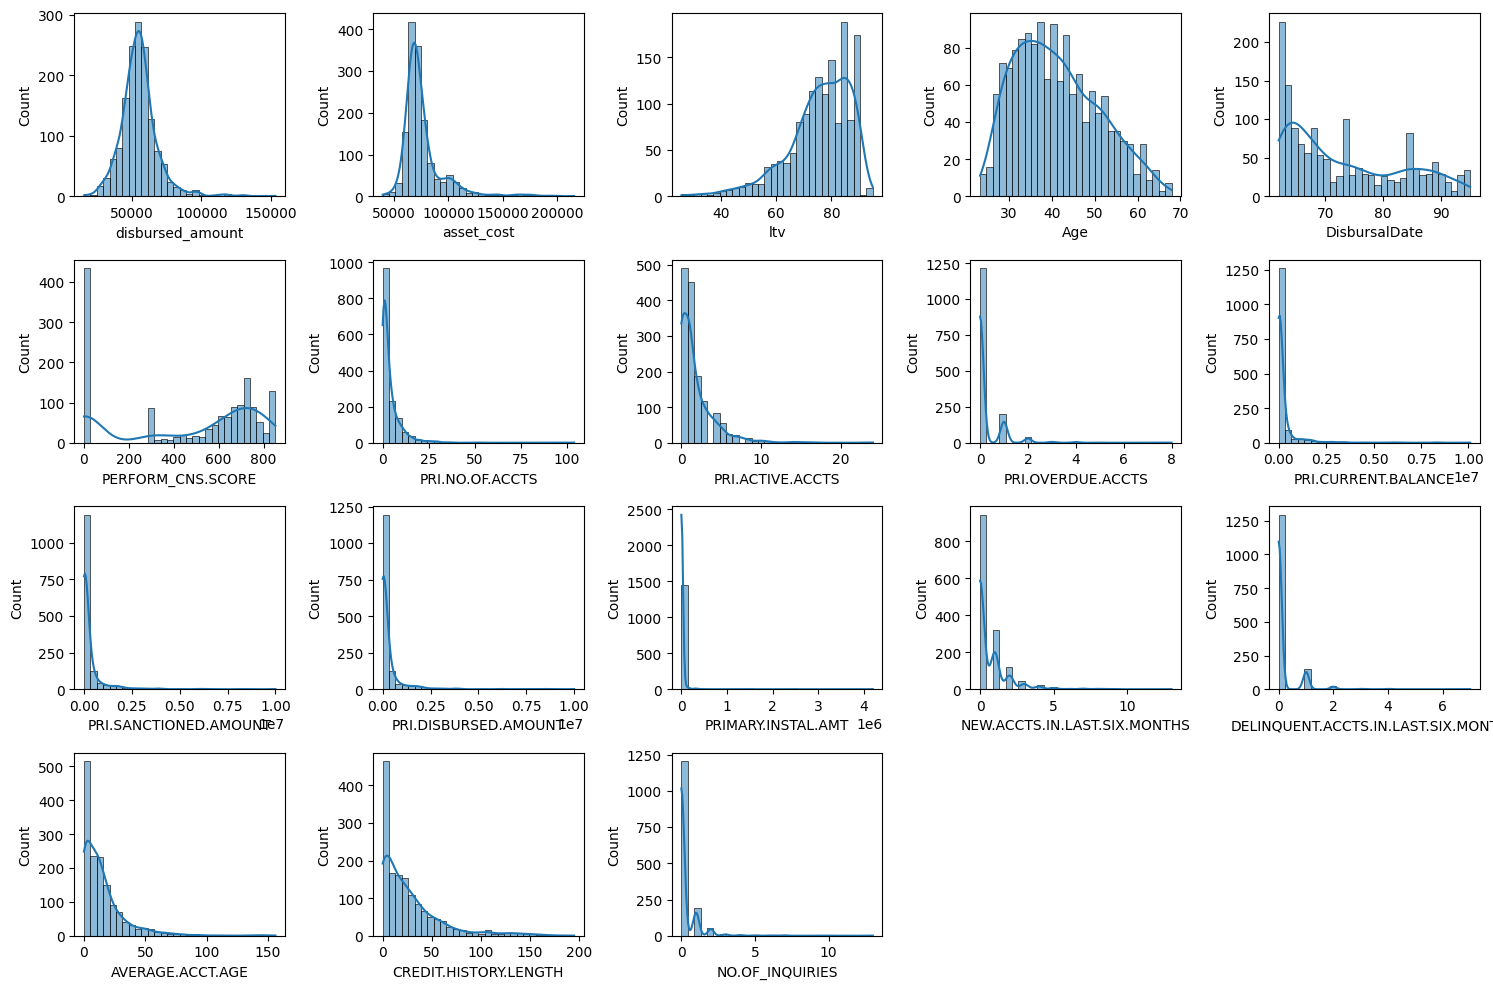

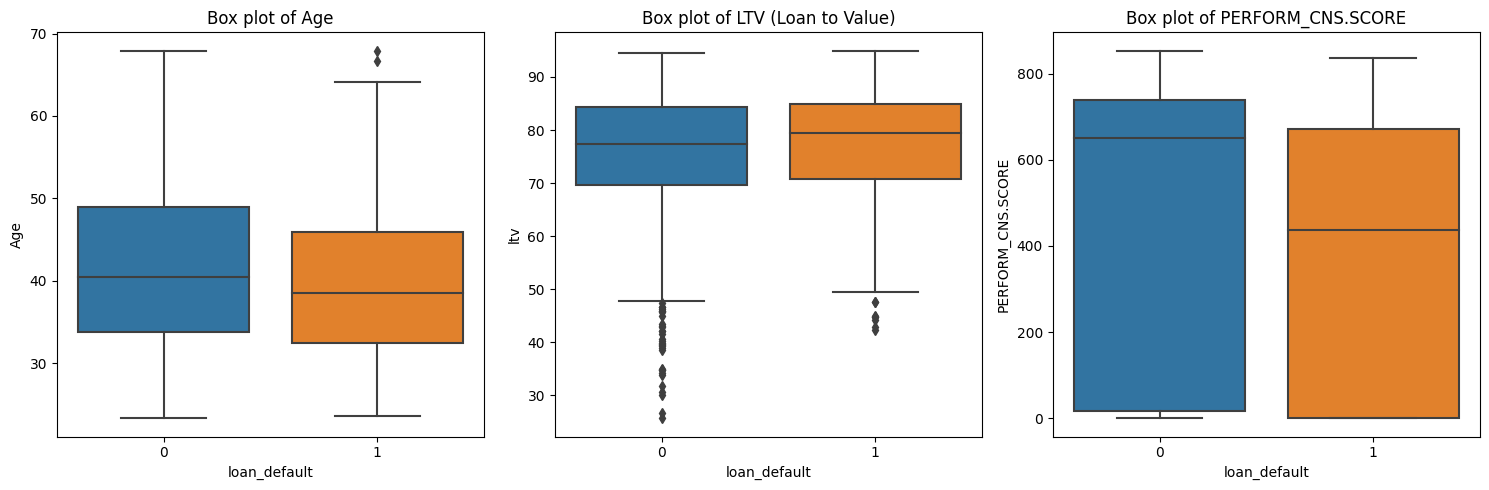

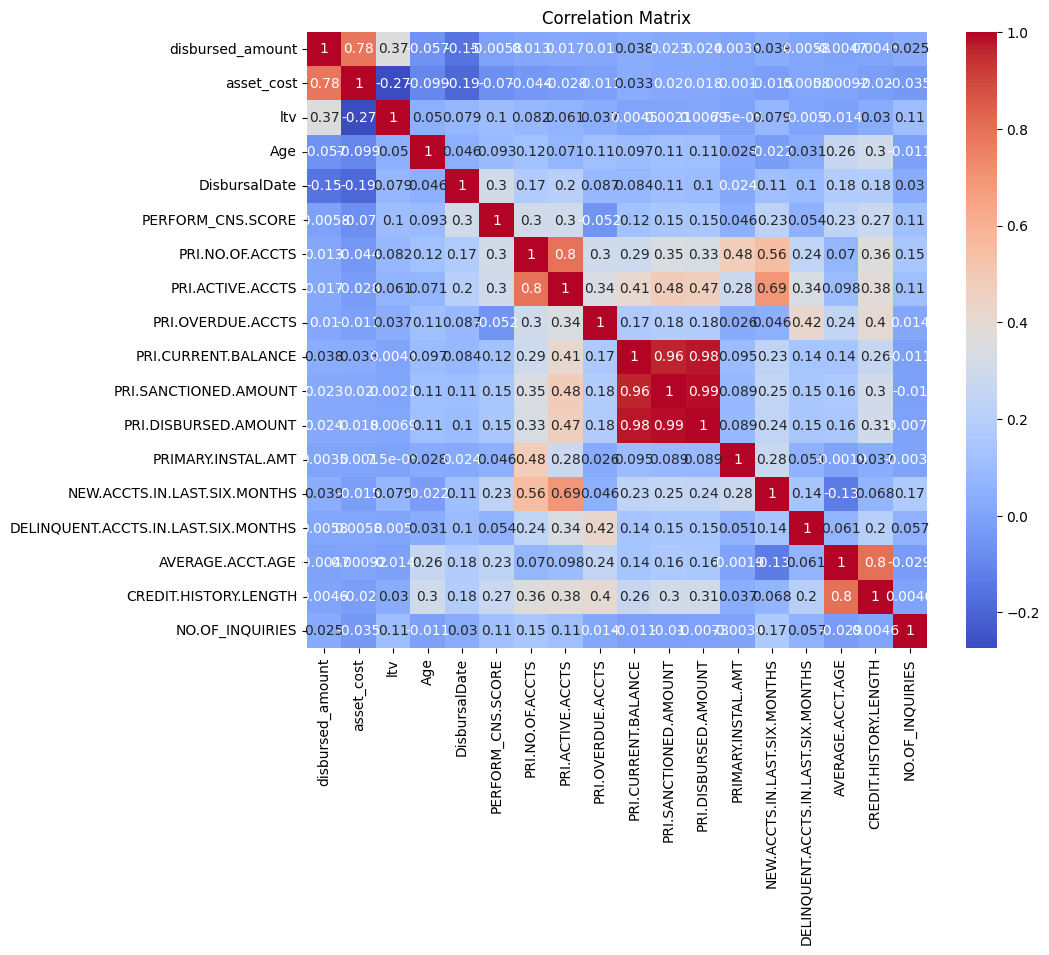

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



#subset des variables numériques
numeric_vars = ['disbursed_amount', 'asset_cost', 'ltv', 'Age',
       'DisbursalDate',  'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES']
data_numeric = data[numeric_vars]

# subset des variables de categories
categorical_vars = ['Employment.Type',  'loan_default','State_ID',]
data_categorical = data[categorical_vars]

# Distribution de chaque variable numérique
plt.figure(figsize=(15, 10))
for i, var in enumerate(data_numeric.columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(data_numeric[var], kde=True, bins=30)
plt.tight_layout()
plt.show()

# Box plots pour age, ltv, et PERFORM_CNS.SCORE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='loan_default', y='Age', data=data)
plt.title('Box plot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(x='loan_default', y='ltv', data=data)
plt.title('Box plot of LTV (Loan to Value)')

plt.subplot(1, 3, 3)
sns.boxplot(x='loan_default', y='PERFORM_CNS.SCORE', data=data)
plt.title('Box plot of PERFORM_CNS.SCORE')
plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


1.   Distribution des Variables Numériques :

Âge : La distribution de l'âge semble relativement uniforme, suggérant une bonne diversité dans la gamme d'âges des clients. Cette diversité est essentielle pour une analyse représentative.

LTV (Loan to Value) : La distribution du
LTV montre une concentration vers des valeurs plus élevées, indiquant que de nombreux prêts sont proches de la valeur maximale de l'actif. Cela pourrait être un facteur de risque pour les défauts de paiement.

Score CNS : La distribution du score CNS est bimodale, avec une concentration significative de clients ayant des scores très bas ou très élevés. Ceci est crucial car des scores faibles peuvent indiquer un risque de crédit plus élevé.

2.   Boîtes à Moustaches :

Âge : Il n'y a pas de différence significative dans la distribution de l'âge entre les clients en défaut et ceux qui ne le sont pas. Cela suggère que l'âge, en tant que variable isolée, n'est peut-être pas un indicateur fort de défaut.

LTV : Les clients en défaut de paiement ont tendance à avoir des LTV légèrement plus élevés. Cela pourrait indiquer que des LTV plus élevés sont associés à un risque accru de défaut.

Score CNS : Il semble y avoir une différence plus nette dans la distribution des scores CNS entre les clients en défaut et ceux qui ne le sont pas. Les clients en défaut ont tendance à avoir des scores plus bas, ce qui suggère que le score CNS est un bon indicateur de risque de défaut.

3.   Matrice de Corrélation :

Les corrélations entre les variables numériques sont généralement faibles à modérées. Cela indique que ces variables fournissent des informations distinctes et peuvent être utiles ensemble dans un modèle prédictif.

Une attention particulière devrait être accordée à toute paire de variables présentant une corrélation élevée, car cela pourrait indiquer une redondance.

# Discretisation des variables

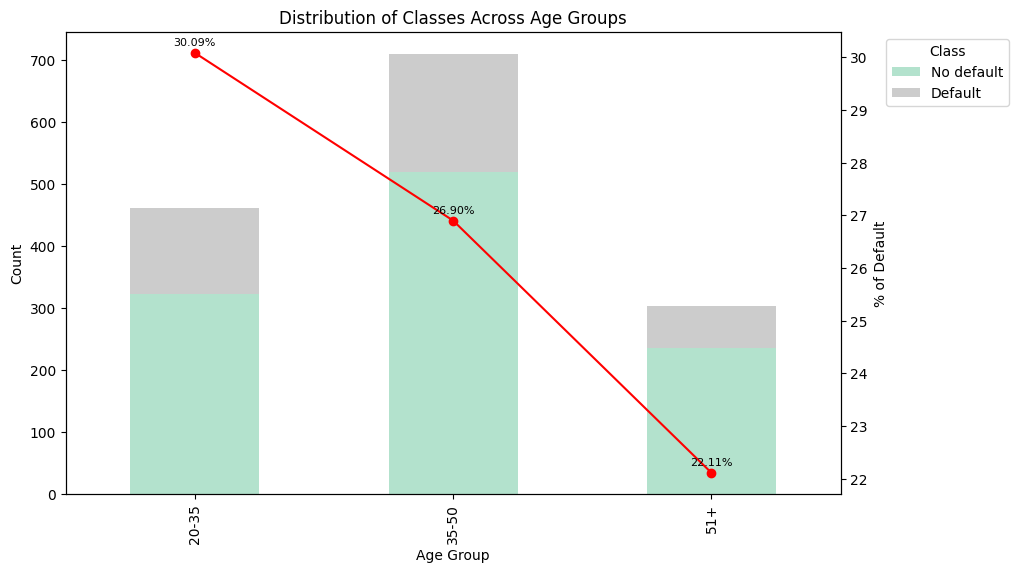

In [ ]:
bins = [20, 35, 50, float('inf')]
labels = ['20-35', '35-50', '51+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
grouped_data = data.groupby(['AgeGroup', 'loan_default']).size().unstack(fill_value=0)

fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_xlabel('Age Group')
ax1.set_title('Distribution of Classes Across Age Groups')
ax2 = ax1.twinx()
class_1_percentage = data[data['loan_default'] == 1].groupby('AgeGroup').size() / data.groupby('AgeGroup').size() * 100
class_1_percentage.plot(kind='line', marker='o', linestyle='-', color='red', ax=ax2)
for i, (x, y) in enumerate(zip(class_1_percentage.index, class_1_percentage.values)):
    ax2.annotate(f'{y:.2f}%', (i, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax2.set_ylabel('% of Default')
ax1.legend(['No default', 'Default'], title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


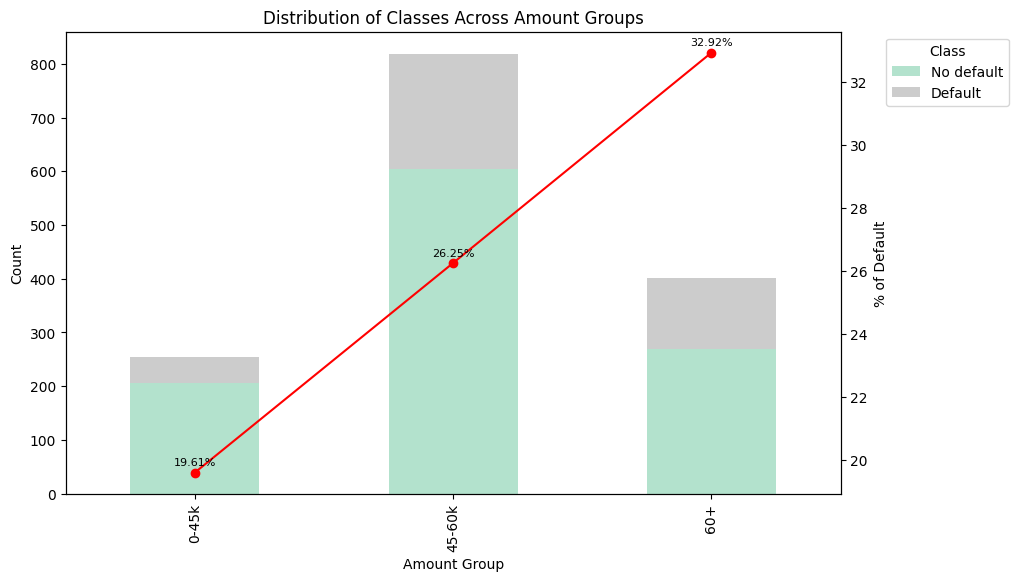

In [ ]:
bins = [0, 45000, 60000, float('inf')]
labels = ['0-45k', '45-60k',  '60+']
data['AmountGroup'] = pd.cut(data['disbursed_amount'], bins=bins, labels=labels, right=False)
grouped_data = data.groupby(['AmountGroup', 'loan_default']).size().unstack(fill_value=0)

fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_xlabel('Amount Group')  # Correct the x-axis label to 'Amount Group'
ax1.set_title('Distribution of Classes Across Amount Groups')  # Correct the title
ax2 = ax1.twinx()
class_1_percentage = data[data['loan_default'] == 1].groupby('AmountGroup').size() / data.groupby('AmountGroup').size() * 100  # Correct the grouping to 'AmountGroup'
class_1_percentage.plot(kind='line', marker='o', linestyle='-', color='red', ax=ax2)
for i, (x, y) in enumerate(zip(class_1_percentage.index, class_1_percentage.values)):
    ax2.annotate(f'{y:.2f}%', (i, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax2.set_ylabel('% of Default')
ax1.legend(['No default', 'Default'], title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


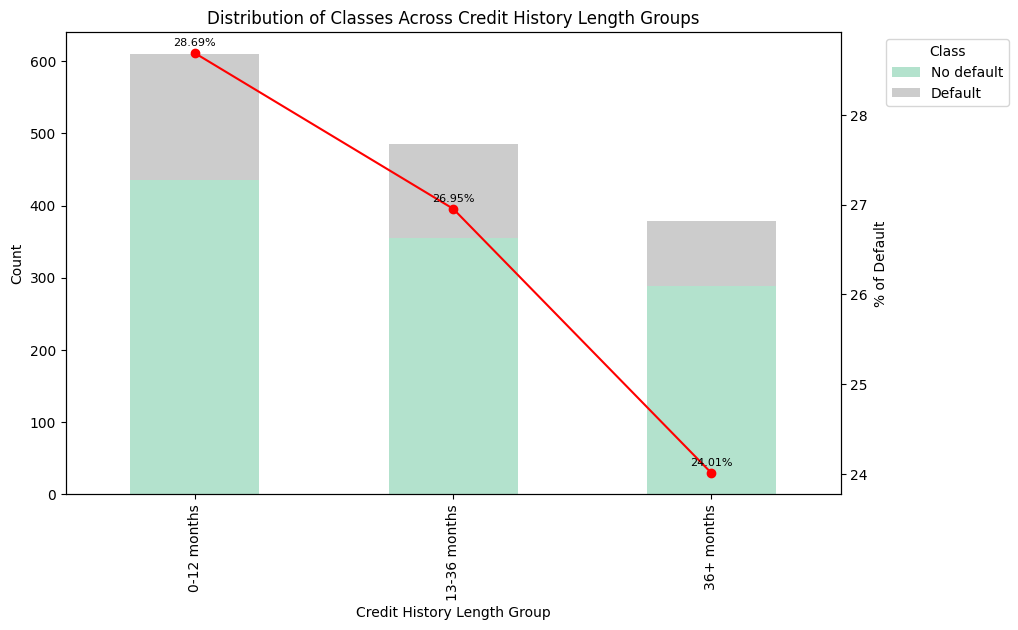

In [ ]:
bins = [0,12 ,36,float('inf')]
labels = ['0-12 months', '13-36 months',  '36+ months']
data['CreditHistoryGroup'] = pd.cut(data['CREDIT.HISTORY.LENGTH'], bins=bins, labels=labels, right=False)

grouped_data = data.groupby(['CreditHistoryGroup', 'loan_default']).size().unstack(fill_value=0)

fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_xlabel('Credit History Length Group')
ax1.set_title('Distribution of Classes Across Credit History Length Groups')

ax2 = ax1.twinx()
class_1_percentage = data[data['loan_default'] == 1].groupby('CreditHistoryGroup').size() / data.groupby('CreditHistoryGroup').size() * 100
class_1_percentage.plot(kind='line', marker='o', linestyle='-', color='red', ax=ax2)
for i, (x, y) in enumerate(zip(class_1_percentage.index, class_1_percentage.values)):
    ax2.annotate(f'{y:.2f}%', (i, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax2.set_ylabel('% of Default')

ax1.legend(['No default', 'Default'], title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


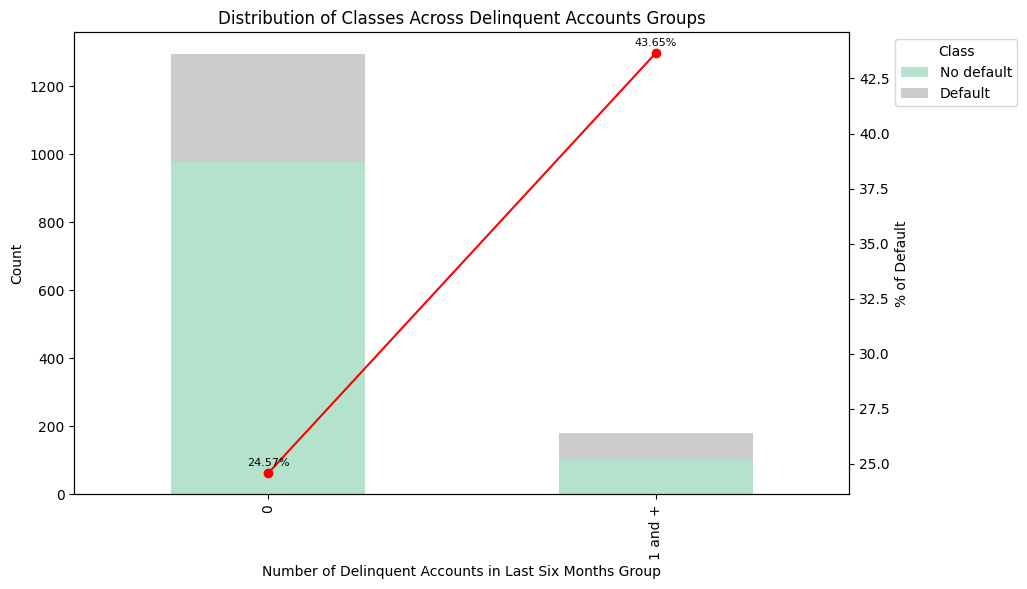

In [ ]:
bins = [0, 1, float('inf')]
labels = ['0', '1 and +']
data['DelinquentAcctsGroup'] = pd.cut(data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'], bins=bins, labels=labels, right=False)

grouped_data = data.groupby(['DelinquentAcctsGroup', 'loan_default']).size().unstack(fill_value=0)

fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_xlabel('Number of Delinquent Accounts in Last Six Months Group')
ax1.set_title('Distribution of Classes Across Delinquent Accounts Groups')

ax2 = ax1.twinx()
class_1_percentage = data[data['loan_default'] == 1].groupby('DelinquentAcctsGroup').size() / data.groupby('DelinquentAcctsGroup').size() * 100
class_1_percentage.plot(kind='line', marker='o', linestyle='-', color='red', ax=ax2)
for i, (x, y) in enumerate(zip(class_1_percentage.index, class_1_percentage.values)):
    ax2.annotate(f'{y:.2f}%', (i, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax2.set_ylabel('% of Default')

ax1.legend(['No default', 'Default'], title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [ ]:
data=data.drop(['DelinquentAcctsGroup','AgeGroup','CreditHistoryGroup','AmountGroup'],axis=1)

# Etude sur l'information value

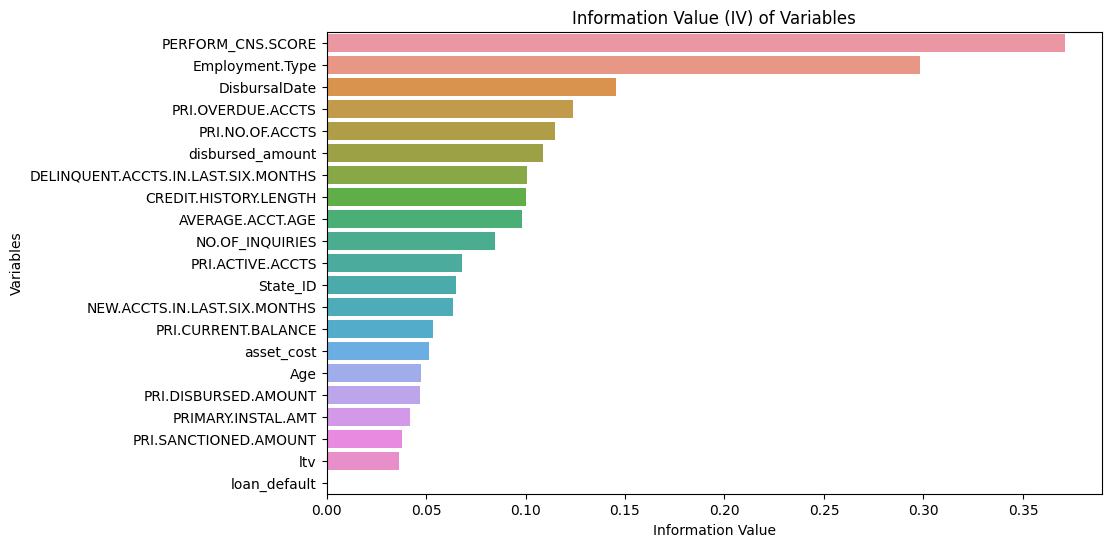

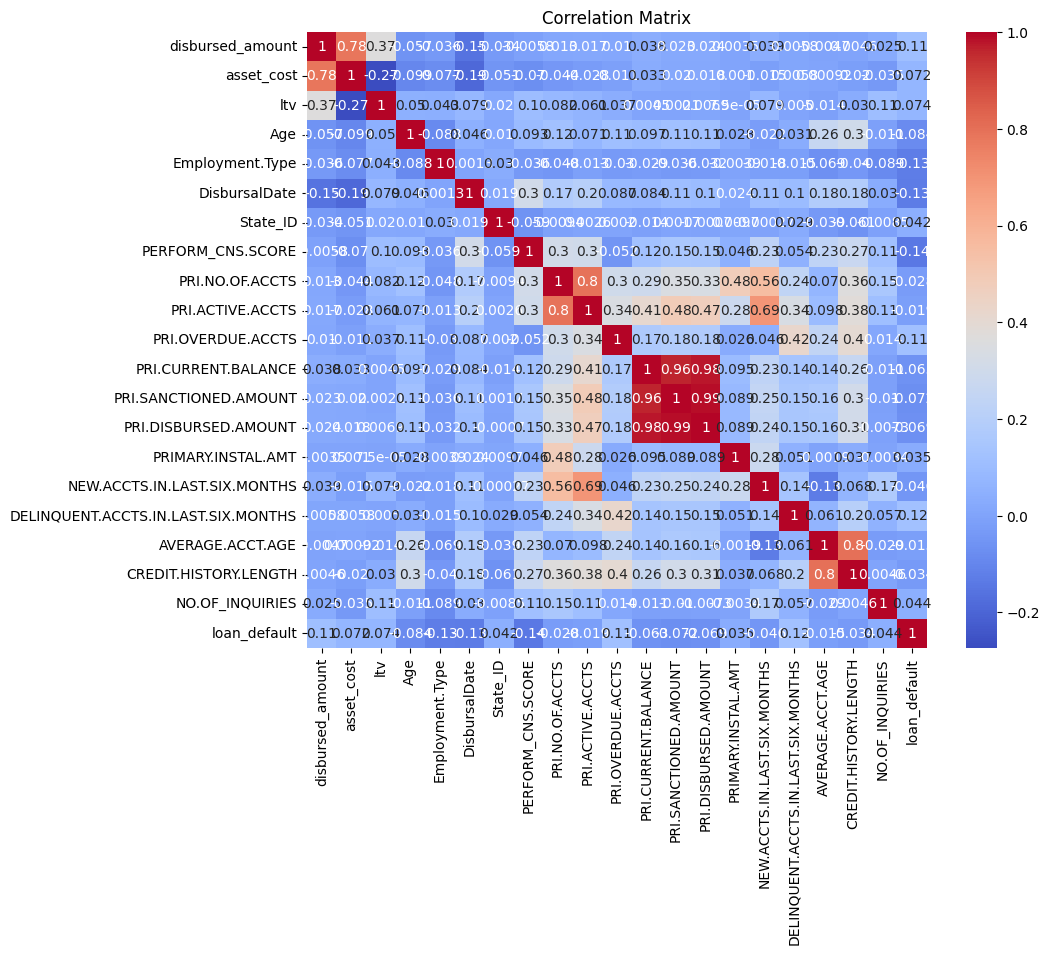

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

def calculate_iv(df, feature, target, bins=10):
    df_binned = df.copy()
    df_binned[feature] = pd.qcut(df[feature].rank(method='first'), q=bins, duplicates='drop')

    iv = 0
    for value in df_binned[feature].unique():
        segment = df_binned[df_binned[feature] == value]
        rate_good = np.sum(segment[target] == 0) / np.sum(df[target] == 0)
        rate_bad = np.sum(segment[target] == 1) / np.sum(df[target] == 1)
        if rate_good == 0 or rate_bad == 0:  # To avoid division by zero
            continue
        iv += (rate_good - rate_bad) * np.log(rate_good / rate_bad)
    return iv

# Calcul de IV pour chaque variable
iv_values = {}
for col in data.columns:
      iv = calculate_iv(data, col, 'loan_default')
      iv_values[col] = iv


sorted_iv = sorted(iv_values.items(), key=lambda x: x[1], reverse=True)
iv_variables = [item[0] for item in sorted_iv]
iv_scores = [item[1] for item in sorted_iv]

plt.figure(figsize=(10, 6))
sns.barplot(x=iv_scores, y=iv_variables)
plt.title('Information Value (IV) of Variables')
plt.xlabel('Information Value')
plt.ylabel('Variables')
plt.show()


corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Selection des variables

Ici, on regarde les variables correlés à plus de 40% et l'on supprime la moins intéressante de chaque couple

In [ ]:
correlation_df = pd.DataFrame(columns=['Variable1', 'Variable2', 'Correlation', 'IV_Variable1', 'IV_Variable2'])

# Loop through the upper triangle of the correlation matrix to find pairs with correlation greater than 30%
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        if abs(corr_matrix.loc[col1, col2]) > 0.4:
            iv_var1 = calculate_iv(data, col1, 'loan_default')
            iv_var2 = calculate_iv(data, col2, 'loan_default')

            correlation_df = correlation_df.append({
                'Variable1': col1,
                'Variable2': col2,
                'Correlation': corr_matrix.loc[col1, col2],
                'IV_Variable1': iv_var1,
                'IV_Variable2': iv_var2
            }, ignore_index=True)

correlation_df

,Variable1,Variable2,Correlation,IV_Variable1,IV_Variable2
0,disbursed_amount,asset_cost,0.781876,0.108634,0.051514
1,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,0.795238,0.114889,0.067936
2,PRI.NO.OF.ACCTS,PRIMARY.INSTAL.AMT,0.480865,0.114889,0.041970
3,PRI.NO.OF.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,0.556376,0.114889,0.063440
4,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,0.410740,0.067936,0.053388
5,PRI.ACTIVE.ACCTS,PRI.SANCTIONED.AMOUNT,0.484138,0.067936,0.037901
6,PRI.ACTIVE.ACCTS,PRI.DISBURSED.AMOUNT,0.468578,0.067936,0.046902
7,PRI.ACTIVE.ACCTS,NEW.ACCTS.IN.LAST.SIX.MONTHS,0.692230,0.067936,0.063440
8,PRI.OVERDUE.ACCTS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.421900,0.123698,0.100914
9,PRI.OVERDUE.ACCTS,CREDIT.HISTORY.LENGTH,0.401438,0.123698,0.100184


Ainsi par exemple,
la corrélation entre disbursed_amount et asset cost est de 78%. Cependant l'information value de disbursed amount est 2x supérieure à celle de asset_cost. Donc on ne garde que la variable asset cost.

In [ ]:
deleted_variables = set()

def delete_worst_iv(row):
    iv_var1 = row['IV_Variable1']
    iv_var2 = row['IV_Variable2']

    if iv_var1 < iv_var2:
        if row['Variable1'] not in deleted_variables:
            data.drop(columns=row['Variable1'], inplace=True)
            deleted_variables.add(row['Variable1'])
    else:
        if row['Variable2'] not in deleted_variables:
            data.drop(columns=row['Variable2'], inplace=True)
            deleted_variables.add(row['Variable2'])

correlation_df.apply(delete_worst_iv, axis=1)

data.columns


Index(['disbursed_amount', 'ltv', 'Age', 'Employment.Type', 'DisbursalDate',
       'State_ID', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.OVERDUE.ACCTS',
       'NO.OF_INQUIRIES', 'loan_default'],
      dtype='object')

In [ ]:
data.head()

,disbursed_amount,ltv,Age,Employment.Type,DisbursalDate,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.OVERDUE.ACCTS,NO.OF_INQUIRIES,loan_default
0,59713,81.63,58.250000,0,62,6,832,15,0,0,1
1,57259,84.19,55.916667,0,62,6,825,4,0,0,0
2,45545,79.69,52.916667,1,87,11,805,10,0,0,0
3,54013,75.72,51.916667,0,87,3,643,4,0,1,0
4,57113,83.86,32.000000,0,62,3,754,3,0,0,1


On retrouve donc ici les variables les plus intéressantes que nous garderons pour la régression

# Modèle de régression logistique

Ajustement du modèle de régression logistique

In [ ]:
y = data['loan_default']
data_cleaned=data.drop('loan_default',axis=1)
X = data_cleaned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#regression logistique
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediction
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculating the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

roc_auc


0.6310301898537192

On obtient un score de roc-auc >0,60

Affinage du modèle et optimisation des paramètres

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np

# Creating a new pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

# Grid search parameters
param_grid = {
    'log_reg__C': np.logspace(-3,3,7),  # Regularization strength
    'log_reg__solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Custom scorer (ROC-AUC)
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=roc_auc_scorer, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score



Fitting 5 folds for each of 14 candidates, totalling 70 fits


({'log_reg__C': 0.01, 'log_reg__solver': 'lbfgs'}, 0.6799537427252659)

Analyse du modèle et des résultats

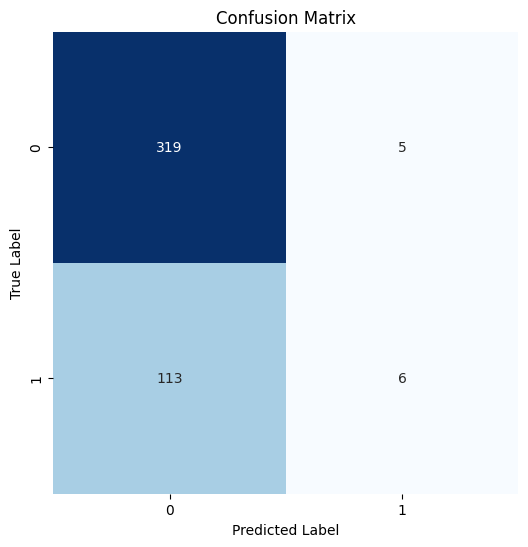

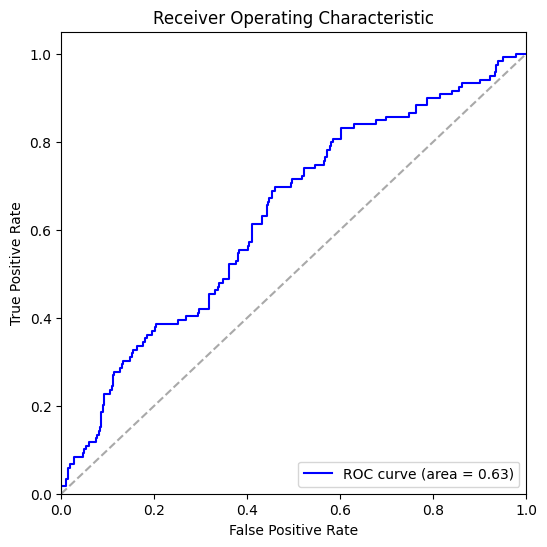

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       324
           1       0.55      0.05      0.09       119

    accuracy                           0.73       443
   macro avg       0.64      0.52      0.47       443
weighted avg       0.69      0.73      0.64       443


ROC AUC Score: 0.6311


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Using the best parameters to create a final model
final_model = LogisticRegression(C=best_params['log_reg__C'], solver=best_params['log_reg__solver'])
final_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_final = final_model.predict(X_test)
y_pred_proba_final = final_model.predict_proba(X_test)[:, 1]

# Classification report
class_report = classification_report(y_test, y_pred_final)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_final)
roc_auc_final = auc(fpr, tpr)


# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print Classification Report
print("Classification Report:")
print(class_report)


# Print ROC AUC Score
print(f"\nROC AUC Score: {roc_auc_final:.4f}")



*   Précision :

Pour la classe 0 (non défaut), la précision est de 74%, indiquant que le modèle est correct dans 74% des prédictions de non défaut.
Pour la classe 1 (défaut), la précision est seulement de 55%, suggérant que le modèle a du mal à prédire avec précision les cas de défaut.

*   Recall

Le rappel pour la classe 0 est élevé à 98%, montrant que le modèle est très efficace pour capturer la majorité des cas réels de non défaut.
Pour la classe 1, le rappel est très bas à 5%, indiquant que le modèle manque la plupart des cas réels de défaut.

*   F1-Score :

Les scores F1 reflètent l'équilibre entre la précision et le rappel.
Le score F1 pour la classe 0 est bon à 84%, suggérant une bonne harmonie entre la précision et le rappel.
Cependant, le score F1 pour la classe 1 est très bas à 9%, indiquant une faible performance globale dans la prédiction des cas de défaut.

*   Matrice de Confusion :

La matrice montre que le modèle prédit correctement la majorité des cas non défaillants (classe 0), mais a du mal à identifier correctement les cas défaillants (classe 1).

*   Courbe ROC et AUC :

Le score AUC (Area Under the Curve) est de 0.6311, ce qui indique une performance modérée dans la capacité du modèle à distinguer entre les classes.
La courbe ROC montre le compromis entre le taux de faux positifs et le taux de vrais positifs.


**Interprétation Globale :**

**Le modèle a une capacité modérée à distinguer entre les cas de défaut et de non défaut.
Cependant, il montre un fort biais en faveur de la prédiction des cas non défaillants, ce qui peut être attribué à un déséquilibre dans les classes de données. Il pourrait être intéressant de s'intéresser de plus près au déséquilibre important des classes.**



# Quantification de la probabilité de défaut

Segmentation des clients en classes de risque

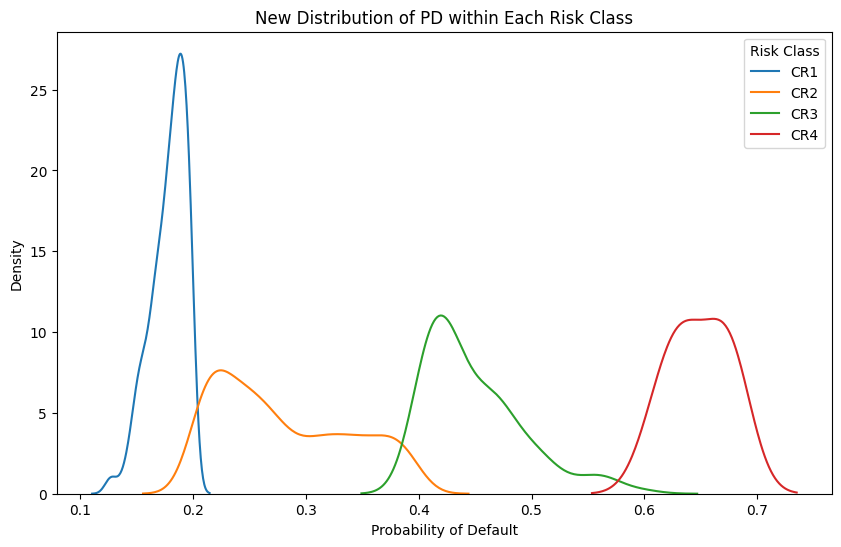

Risk_Class_New
CR1    0.178364
CR2    0.280497
CR3    0.449256
CR4    0.648486
Name: PD, dtype: float64

In [ ]:
data['PD'] = final_model.predict_proba(X)[:, 1]
new_thresholds = {
    'CR1': 0.20,  # PD < 20%
    'CR2': 0.40,  # 20% ≤ PD < 40%
    'CR3': 0.60,  # 40% ≤ PD < 60%
    'CR4': 1.00   # PD ≥ 60%
}

data['Risk_Class_New'] = pd.cut(data['PD'], bins=[0, new_thresholds['CR1'], new_thresholds['CR2'], new_thresholds['CR3'], new_thresholds['CR4']], labels=['CR1', 'CR2', 'CR3', 'CR4'], right=False)
average_PD_per_class_new = data.groupby('Risk_Class_New')['PD'].mean()

plt.figure(figsize=(10, 6))
for class_label in ['CR1', 'CR2', 'CR3', 'CR4']:
    sns.kdeplot(data[data['Risk_Class_New'] == class_label]['PD'], label=class_label)
plt.title('New Distribution of PD within Each Risk Class')
plt.xlabel('Probability of Default')
plt.ylabel('Density')
plt.legend(title='Risk Class')
plt.show()

average_PD_per_class_new



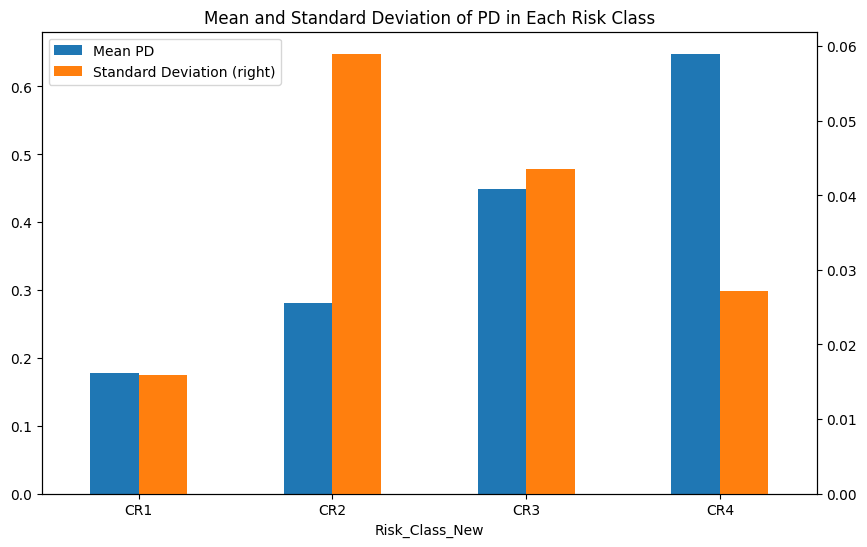

,Mean PD,Standard Deviation
Risk_Class_New,,
CR1,0.178364,0.015889
CR2,0.280497,0.059010
CR3,0.449256,0.043506
CR4,0.648486,0.027174


In [ ]:
std_dev_per_class = data.groupby('Risk_Class_New')['PD'].std()
mean_std_df = pd.DataFrame({
    'Mean PD': average_PD_per_class_new,
    'Standard Deviation': std_dev_per_class
})

mean_std_df.plot(kind='bar', secondary_y='Standard Deviation', figsize=(10, 6), rot=0)
plt.title('Mean and Standard Deviation of PD in Each Risk Class')
plt.xlabel('Risk Class')
plt.show()

mean_std_df


Examen de la stabilité et robustesse de ces classes de risque

Analyse :

*   Les classes de risque présentent des distributions de PD distinctes avec des écarts-types variés, indiquant des niveaux de volatilité différents au sein de chaque classe.
*   La classe CR4, bien qu'ayant la plus haute moyenne de PD, montre un écart-type comparable à celui des autres classes, suggérant une certaine stabilité dans les PD élevés.
*   Les classes CR1 et CR2 montrent une plus grande variabilité dans leurs PD (comme indiqué par des écarts-types plus élevés), ce qui pourrait indiquer une hétérogénéité au sein de ces classes.



**Ajustements**
On peut ajuster notre moyenne de probability of default à la hausse en fonction de l'écart type. Ici on écrit m= m + 0.5sigma




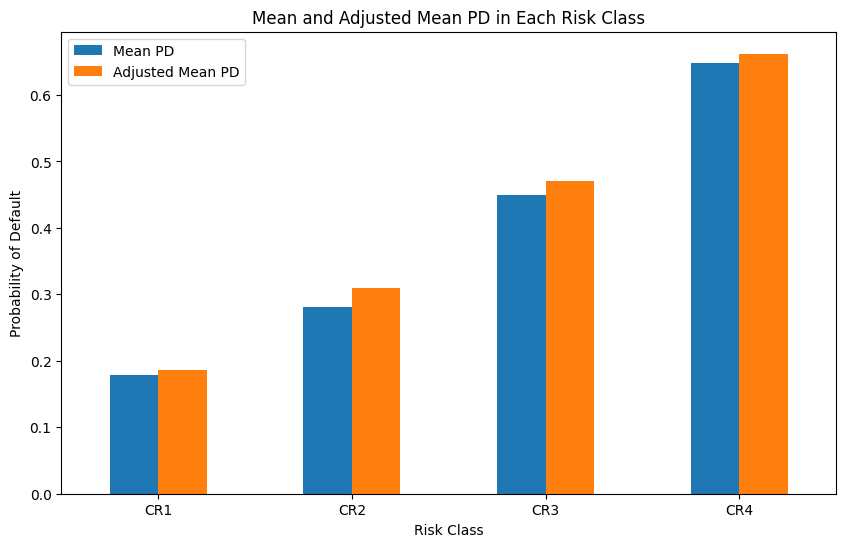

,Mean PD,Standard Deviation,Adjusted Mean PD
Risk_Class_New,,,
CR1,0.178364,0.015889,0.186308
CR2,0.280497,0.059010,0.310002
CR3,0.449256,0.043506,0.471009
CR4,0.648486,0.027174,0.662073


In [ ]:
adjustment_factor = 0.5
mean_std_df['Adjusted Mean PD'] = mean_std_df['Mean PD'] + (adjustment_factor * mean_std_df['Standard Deviation'])

# Visualizing the adjusted PD means
mean_std_df[['Mean PD', 'Adjusted Mean PD']].plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Mean and Adjusted Mean PD in Each Risk Class')
plt.xlabel('Risk Class')
plt.ylabel('Probability of Default')
plt.show()

mean_std_df



Le graphique illustre la comparaison entre les PD moyennes initiales et les PD moyennes ajustées pour chaque classe. L'ajustement a augmenté légèrement la probabilité de défaut dans chaque classe pour refléter une approche plus prudente, en particulier pour les classes où il y avait une plus grande volatilité (CR2 et CR3).